# Palmer Penguins Modeling

Import the Palmer Penguins dataset and print out the first few rows.

Suppose we want to predict `bill_depth_mm` using the other variables in the dataset.

Which variables would we need to **dummify**?

In [2]:
!pip install palmerpenguins

In [4]:
import pandas as pd
import numpy as np
import sklearn as sk
from palmerpenguins import load_penguins
penguins = load_penguins()
penguins_clean = penguins.dropna(subset=['bill_length_mm', 'bill_depth_mm'])
penguins_clean.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,male,2007


In [25]:
encoded_df = pd.get_dummies(penguins_clean[['species','island','sex']])
encoded_df

,species_Adelie,species_Chinstrap,species_Gentoo,island_Biscoe,island_Dream,island_Torgersen,sex_female,sex_male
0,1,0,0,0,0,1,0,1
1,1,0,0,0,0,1,1,0
2,1,0,0,0,0,1,1,0
4,1,0,0,0,0,1,1,0
5,1,0,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...
339,0,1,0,0,1,0,0,1
340,0,1,0,0,1,0,1,0
341,0,1,0,0,1,0,0,1
342,0,1,0,0,1,0,0,1


In [8]:
import numpy as np
import pandas as pd
from sys import exit
from palmerpenguins import load_penguins
from sklearn.linear_model import LinearRegression
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, PolynomialFeatures
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt

In [5]:
penguins = penguins.dropna(subset=['bill_length_mm', 'bill_depth_mm', 'sex', 'species', 'island'])
cols_species_island = pd.get_dummies(penguins[['species', 'island']])
cols_sex = pd.get_dummies(penguins['sex'], drop_first=True)
df = penguins.drop(['species', 'island', 'sex'], axis=1)
df = pd.concat([df, cols_species_island, cols_sex], axis=1)
df

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,year,species_Adelie,species_Chinstrap,species_Gentoo,island_Biscoe,island_Dream,island_Torgersen,male
0,39.1,18.7,181.0,3750.0,2007,1,0,0,0,0,1,1
1,39.5,17.4,186.0,3800.0,2007,1,0,0,0,0,1,0
2,40.3,18.0,195.0,3250.0,2007,1,0,0,0,0,1,0
4,36.7,19.3,193.0,3450.0,2007,1,0,0,0,0,1,0
5,39.3,20.6,190.0,3650.0,2007,1,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
339,55.8,19.8,207.0,4000.0,2009,0,1,0,0,1,0,1
340,43.5,18.1,202.0,3400.0,2009,0,1,0,0,1,0,0
341,49.6,18.2,193.0,3775.0,2009,0,1,0,0,1,0,1
342,50.8,19.0,210.0,4100.0,2009,0,1,0,0,1,0,1


In [11]:
## Preprocessing: One-hot-encode
## Model spec:  Linear Regression

lr = LinearRegression()
enc = OneHotEncoder()

ct = ColumnTransformer(
    [("dummify_s", enc, ['species']),
    ("dummify_i", enc, ['island']),
    ("dummify_sex", enc, ['sex'])]
)

# [('scaler', StandardScaler()), ('svc', SVC())]

my_pipeline = Pipeline(
    [('dummify_everything', ct), ('ols', lr)]
)
y = df['bill_depth_mm']
X = df[['bill_length_mm']]

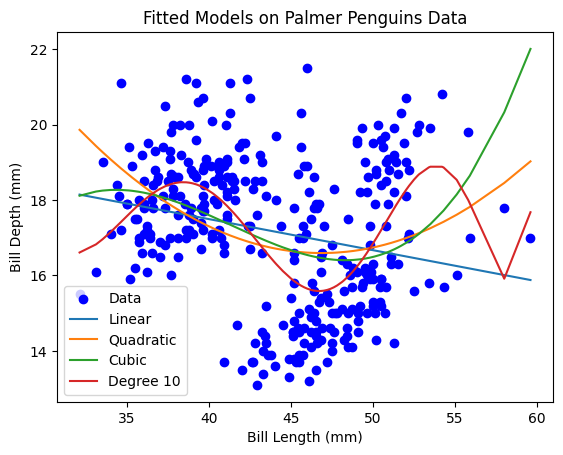

In [12]:
def create_pipeline(degree):
    return Pipeline([
        ('poly', PolynomialFeatures(degree=degree)),
        ('ols', LinearRegression())
    ])

linear_model = create_pipeline(1)
linear_model.fit(X, y)
y_linear = linear_model.predict(X)

quadratic_model = create_pipeline(2)
quadratic_model.fit(X, y)
y_quadratic = quadratic_model.predict(X)

cubic_model = create_pipeline(3)
cubic_model.fit(X, y)
y_cubic = cubic_model.predict(X)

degree10_model = create_pipeline(10)
degree10_model.fit(X, y)
y_degree10 = degree10_model.predict(X)
sorted_indices = X.squeeze().argsort()
X_sorted = X.iloc[sorted_indices]
y_sorted = y.iloc[sorted_indices]

y_linear_sorted = y_linear[sorted_indices]
y_quadratic_sorted = y_quadratic[sorted_indices]
y_cubic_sorted = y_cubic[sorted_indices]
y_degree10_sorted = y_degree10[sorted_indices]

plt.scatter(X_sorted, y_sorted, color='blue', label='Data')
plt.plot(X_sorted, y_linear_sorted, label='Linear')
plt.plot(X_sorted, y_quadratic_sorted, label='Quadratic')
plt.plot(X_sorted, y_cubic_sorted, label='Cubic')
plt.plot(X_sorted, y_degree10_sorted, label='Degree 10')
plt.legend()
plt.xlabel('Bill Length (mm)')
plt.ylabel('Bill Depth (mm)')
plt.title('Fitted Models on Palmer Penguins Data')
plt.show()

Let's use `bill_length_mm` to predict `bill_depth_mm`. Prepare your data and fit the following models on the entire dataset:

* Simple linear regression (e.g. straight-line) model
* Quadratic (degree 2 polynomial) model
* Cubic (degree 3 polynomial) model
* Degree 10 polynomial model

Make predictions for each model and plot your fitted models on the scatterplot.

In [26]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
lr = LinearRegression()

In [27]:
y = penguins_clean['bill_depth_mm']
X = penguins_clean[['bill_length_mm']]

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

# Simple Linear Regression
lr_fit = lr.fit(X_train, y_train)

# Quadratic Model
poly_features_2 = PolynomialFeatures(degree=2, include_bias=False)
X_poly_2 = poly_features_2.fit_transform(X_train)
quad_reg = LinearRegression()
quad_reg.fit(X_poly_2, y_train)

# Cubic Model
poly_features_3 = PolynomialFeatures(degree=3, include_bias=False)
X_poly_3 = poly_features_3.fit_transform(X_train)
cubic_reg = LinearRegression()
cubic_reg.fit(X_poly_3, y_train)

# Degree 10 Polynomial Model
poly_features_10 = PolynomialFeatures(degree=10, include_bias=False)
X_poly_10 = poly_features_10.fit_transform(X_train)
poly10_reg = LinearRegression()
poly10_reg.fit(X_poly_10, y_train)


LinearRegression()

In [28]:
lr_fit.coef_

array([-0.07131841])

In [32]:
y_pred_lr = lr_fit.predict(X_test)
y_pred_quad = quad_reg.predict(poly_features_2.transform(X_test))
y_pred_cubic = cubic_reg.predict(poly_features_3.transform(X_test))
y_pred_poly10 = poly10_reg.predict(poly_features_10.transform(X_test))

from sklearn.metrics import mean_squared_error

mse_lr = mean_squared_error(y_test, y_pred_lr)
mse_quad = mean_squared_error(y_test, y_pred_quad)
mse_cubic = mean_squared_error(y_test, y_pred_cubic)
mse_poly10 = mean_squared_error(y_test, y_pred_poly10)
mse_lr, mse_quad, mse_cubic, mse_poly10

(4.11954699464267, 3.865855311515306, 3.6530169630421683, 3.011763231050335)

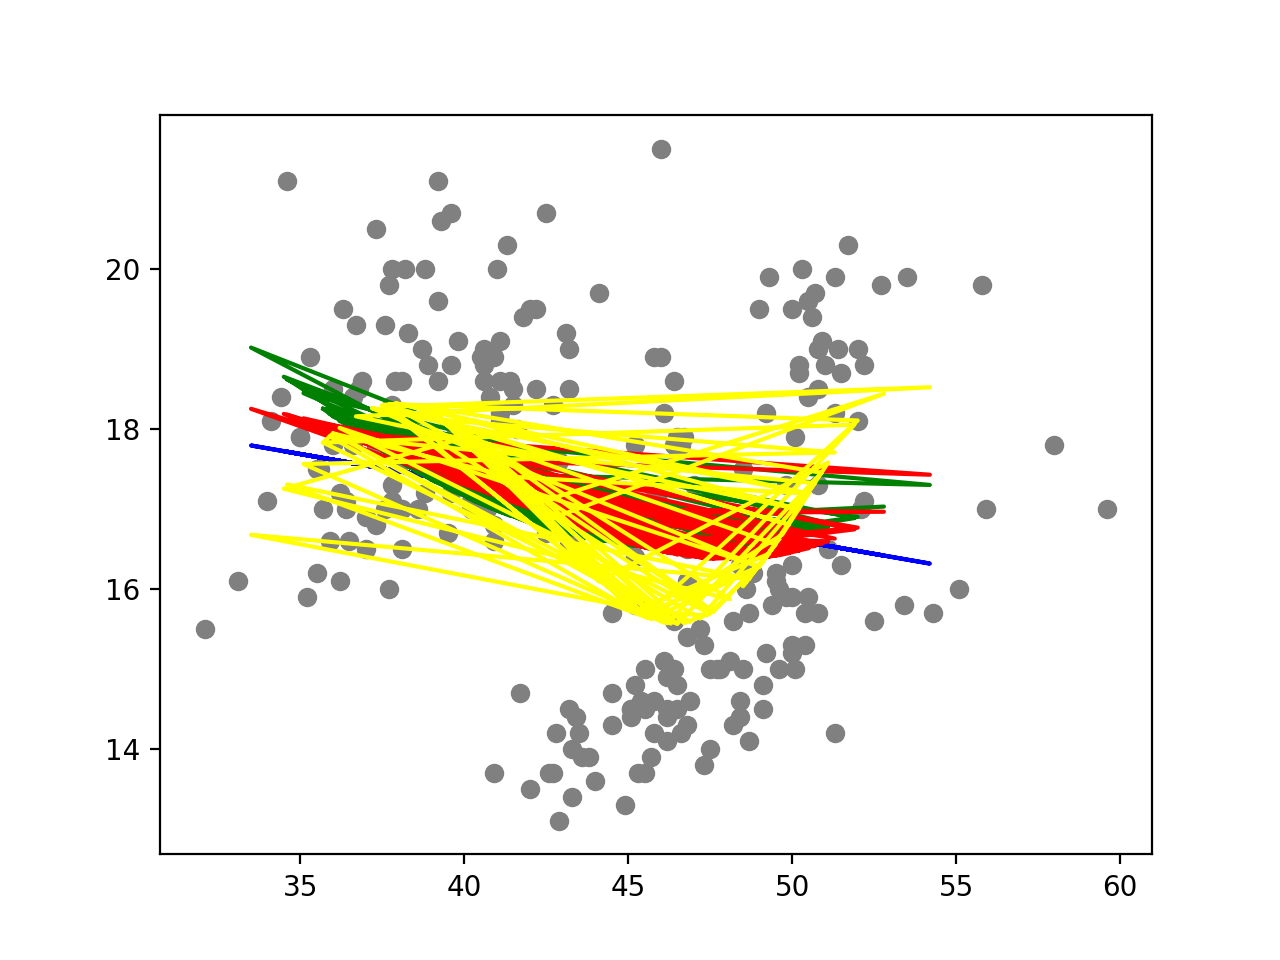

In [43]:
import matplotlib.pyplot as plt
plt.scatter(X_train, y_train,color='grey')
plt.plot(X_test, y_pred_lr,color='blue')
plt.plot(X_test, y_pred_quad,color='green')
plt.plot(X_test, y_pred_cubic,color='red')
plt.plot(X_test, y_pred_poly10,color='yellow')

plt.show()

* Are any of the models above underfitting the data? If so, which ones and how can you tell?
* Are any of thhe models above overfitting the data? If so, which ones and how can you tell?
* Which of the above models do you think fits the data best and why?



*   The linear model is underfitting the data. The plot line covers too less data.
*   The degree 10 polynomial is overfitting the data. The plot line covers too much data.
*   The cubic model fits the data best because it has a lower MSE and doesn't overfit the data.



